1/13/22
# This file goes in the meof_hcast_cross.ipnyb file. it was used to find out smoothed unweighted dp1 region would recreate corr/rmse decently well.

# Set up our 1980-2021 dp1_mean (just so i know how to do it below)

In [ ]:
# LOOKING at the dp1 mean: for each month. 513 months.
xticks = np.arange(1,13)
# for correlation purposes: sic_here is 1980-2021. and the valid points of display.
# cy2004 paper has 1980-2000 in fire 6.
sic_here = sic_anom.isel(tdim=slice(12, 504)).where(validpoints)
sic_obsr = sic_here.where(dp1_region)

In [ ]:
sic_obsr_weights = np.cos(np.deg2rad(sic_obsr.y))
sic_obsr_wghtd = sic_obsr * sic_obsr_weights
w_dp1_mean = sic_obsr_wghtd.mean(dim=['x', 'y'])

uw_dp1_mean = sic_obsr.mean(dim=['x','y'])

## Set up our 1980-2021 dp1_mean, for correlation tests but keep for reference: smoothed data, unweighted average!

In [6]:
# LOOKING at the dp1 mean: for each month. 513 months.
xticks = np.arange(1,13)
# for correlation purposes: sic_here is 1980-2021. and the valid points of display.
# cy2004 paper has 1980-2000 in fire 6.
sic_here = sic_anom.isel(tdim=slice(12, 504)).where(validpoints)
sic_obsr = sic_here.where(dp1_region)

In [40]:
sic_obsr_weights = np.cos(np.deg2rad(sic_obsr.y))
sic_obsr_wghtd = sic_obsr * sic_obsr_weights
w_dp1_mean = sic_obsr_wghtd.mean(dim=['x', 'y'])

uw_dp1_mean = sic_obsr.mean(dim=['x','y'])

### We are gonna use this smooth_ts() function in the variable_processing file. just creating it here
- it takes a 3 month moving window, but for the edge cases, just averages the two months' data.
- the smoothed ts has the same time period as the unsmoothed ts.

In [45]:
def smooth_ts(unsmoothed):
    smoothed = unsmoothed.rolling(tdim=3, center=True).mean()
    smoothed[0] = (unsmoothed[0] + unsmoothed[1]) / 2
    smoothed[-1] = (unsmoothed[-1] + unsmoothed[-2]) / 2
    return smoothed
dp1_mean = smooth_ts(uw_dp1_mean)

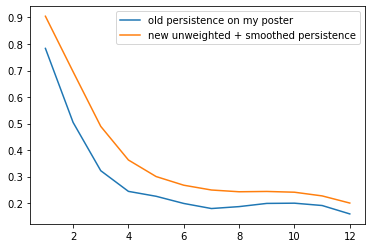

In [47]:
xticks = np.arange(1,13)

persistence_old_xr = np.zeros(12)
persistence_xr = np.zeros(12)
for lag in range(1,13):
    persistence_old_xr[lag-1] = xr.corr(w_dp1_mean.shift(tdim=-lag), w_dp1_mean, dim='tdim').data
    persistence_xr[lag-1] = xr.corr(dp1_mean.shift(tdim=-lag), dp1_mean, dim='tdim').data
plt.plot(xticks, persistence_old_xr)
plt.plot(xticks, persistence_xr)
plt.legend(['old persistence on my poster', 'new unweighted + smoothed persistence'])
plt.show()

# Recreating the cy2004 SIC data EXACTLY and look at ACF in dp1. This is 0.5x2 lat-long grid. (data file created in sic_files) hint: 0.5x2 and 0.5x1 are essentially the same after averaging over dp1 region.

When I use "og", I mean the real cy2004, gridded in what it used. it is the og cy2004 data. 2longx0.5lat

In [9]:
filename = '/d6/bxw2101/combined_netcdf_files/cy2004_sic_anom_monthly_2x0p5.nc'
og_sic_anom_ds = xr.open_dataset(filename).fillna(0)
og_sic_anom = og_sic_anom_ds.sic_anom

In [10]:
#Weigh here
og_sic_here = og_sic_anom.isel(tdim=slice(12, 504)).where(validpoints)
og_sic_obsr = og_sic_here.where(dp1_region)
og_sic_obsr_weights = np.cos(np.deg2rad(og_sic_obsr.y))
og_sic_obsr_wghtd = og_sic_obsr * og_sic_obsr_weights

og_dp1_mean = og_sic_obsr_wghtd.mean(dim=['x', 'y'])
uw_og_dp1_mean = og_sic_obsr.mean(dim=['x','y'])

#Smooth here
smooth_og_dp1_mean = og_dp1_mean.rolling(tdim=3,center=True).mean()
smooth_uw_og_dp1_mean = uw_og_dp1_mean.rolling(tdim=3, center=True).mean()

Smoothed correlation (3 month rolling avg):
[0.93087863 0.77435545 0.60357267 0.47855128 0.4070718  0.37762304
 0.37283216 0.37620803 0.36987399 0.34381128 0.29803246 0.24225117]


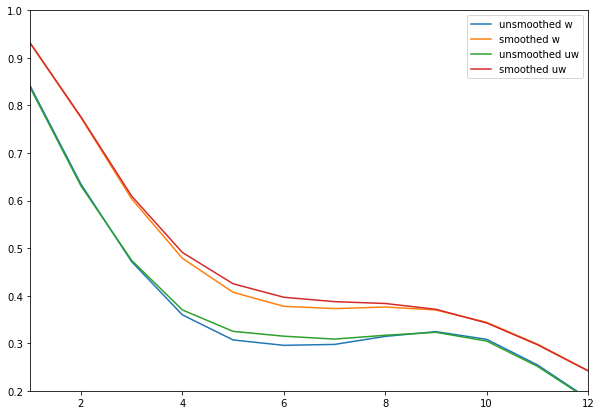

In [11]:
fig = plt.figure(figsize=(10, 7))
og_persistence_xr = np.zeros(12)
smooth_og_persistence_xr = np.zeros(12)
smooth_uw_og_persistence_xr = np.zeros(12)
uw_og_persistence_xr = np.zeros(12)
for lag in range(1,13):
    og_persistence_xr[lag-1] = xr.corr(og_dp1_mean.shift(tdim=-lag), og_dp1_mean, dim='tdim').data
    smooth_og_persistence_xr[lag-1] = xr.corr(smooth_og_dp1_mean.shift(tdim=-lag), smooth_og_dp1_mean, dim='tdim').data
    uw_og_persistence_xr[lag-1] = xr.corr(uw_og_dp1_mean.shift(tdim=-lag), uw_og_dp1_mean, dim='tdim').data
    smooth_uw_og_persistence_xr[lag-1] = xr.corr(smooth_uw_og_dp1_mean.shift(tdim=-lag), smooth_uw_og_dp1_mean, dim='tdim').data
plt.plot(xticks, og_persistence_xr)
plt.plot(xticks, smooth_og_persistence_xr)
plt.plot(xticks, uw_og_persistence_xr)
plt.plot(xticks, smooth_uw_og_persistence_xr)
plt.legend(['unsmoothed w', 'smoothed w', 'unsmoothed uw', 'smoothed uw'])
plt.ylim([0.2, 1])
plt.xlim([1, 12])
print('Smoothed correlation (3 month rolling avg):')
print(smooth_og_persistence_xr)

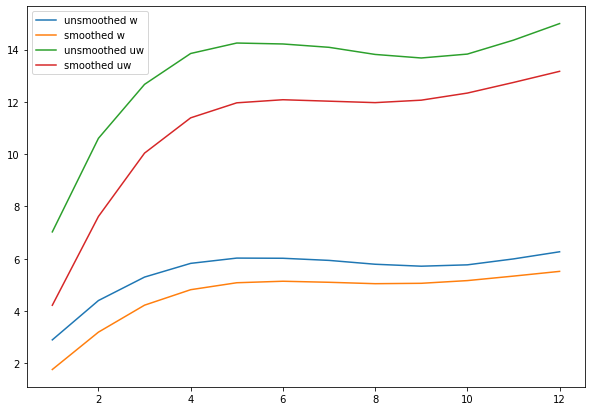

In [12]:
fig = plt.figure(figsize=(10, 7))
og_persistence_rmse = np.array([ xs.rmse(og_dp1_mean.shift(tdim=-i), og_dp1_mean, dim='tdim', skipna=True).data for i in range(1,13) ]) * 100
plt.plot(xticks, og_persistence_rmse)

smooth_og_persistence_rmse = np.array([ xs.rmse(smooth_og_dp1_mean.shift(tdim=-i), smooth_og_dp1_mean, dim='tdim', skipna=True).data for i in range(1,13) ]) * 100
plt.plot(xticks, smooth_og_persistence_rmse)

uw_og_persistence_rmse = np.array([ xs.rmse(uw_og_dp1_mean.shift(tdim=-i), uw_og_dp1_mean, dim='tdim', skipna=True).data for i in range(1,13) ]) * 100
plt.plot(xticks, uw_og_persistence_rmse)

smooth_uw_persistence_rmse = np.array([ xs.rmse(smooth_uw_og_dp1_mean.shift(tdim=-i), smooth_uw_og_dp1_mean, dim='tdim', skipna=True).data for i in range(1,13) ]) * 100
plt.plot(xticks, smooth_uw_persistence_rmse)

plt.legend(['unsmoothed w','smoothed w','unsmoothed uw', 'smoothed uw'])